In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-cic-ids-2018/test/test.csv
/kaggle/input/clean-cic-ids-2018/train/03-01-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-22-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-21-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-23-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-15-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-28-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-16-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/03-02-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-14-2018_clean.csv
/kaggle/input/clean-cic-ids-2018/train/02-20-2018_clean.csv


In [2]:
# Define the list of file names
file_names = [
    "/kaggle/input/clean-cic-ids-2018/train/02-14-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-15-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-16-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-20-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-21-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-22-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-23-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/02-28-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/03-01-2018_clean.csv",
    "/kaggle/input/clean-cic-ids-2018/train/03-02-2018_clean.csv"
]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file names and read each file as a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined DataFrame
print(df.shape)

(12639793, 71)


In [3]:
test = pd.read_csv("/kaggle/input/clean-cic-ids-2018/test/test.csv", index_col=False)
test = test.drop(columns='Unnamed: 0')
print(test.shape)

(3159955, 71)


In [4]:
features = [
    "PSH Flag Cnt",
    "Dst Port",
    "Init Fwd Win Byts",
    "RST Flag Cnt",
    "Fwd PSH Flags",
    "Bwd IAT Max",
    "Date",
    "Fwd IAT Tot",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Fwd Seg Size Min",
    "Bwd Seg Size Avg",
    "Flow Duration",
    "Init Bwd Win Byts",
    "Fwd IAT Mean",
    "Pkt Len Std",
    "Bwd Pkts/s",
    "Time",
    "Bwd Pkt Len Mean",
    "Fwd Pkt Len Max",
    "Fwd Pkts/s",
    "Bwd Header Len",
    "Bwd IAT Tot",
    "Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Max",
    "Subflow Fwd Byts",
    "Flow IAT Max",
    "ACK Flag Cnt",
    "Flow IAT Mean",
    "TotLen Fwd Pkts",
    "Fwd Header Len",
    "Protocol",
    "ECE Flag Cnt",
    "Pkt Len Var",
    "SYN Flag Cnt"
]
len(features)

36

In [5]:
cols_to_drop = [col for col in df.columns if col not in features and col != 'Label']
df.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [6]:
X_train = df.drop('Label', axis=1)
y_train = df['Label']
X_test = test.drop('Label', axis=1)
y_test = test['Label']

In [7]:
from xgboost import XGBClassifier

# Calculate class weights
class_weights = len(y_train) / (6 * np.bincount(y_train))

# Create the XGBClassifier with class weights
model1 = XGBClassifier(n_jobs=-1)

# Fit the model with class weights
model1.fit(X_train, y_train, sample_weight=class_weights[y_train])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

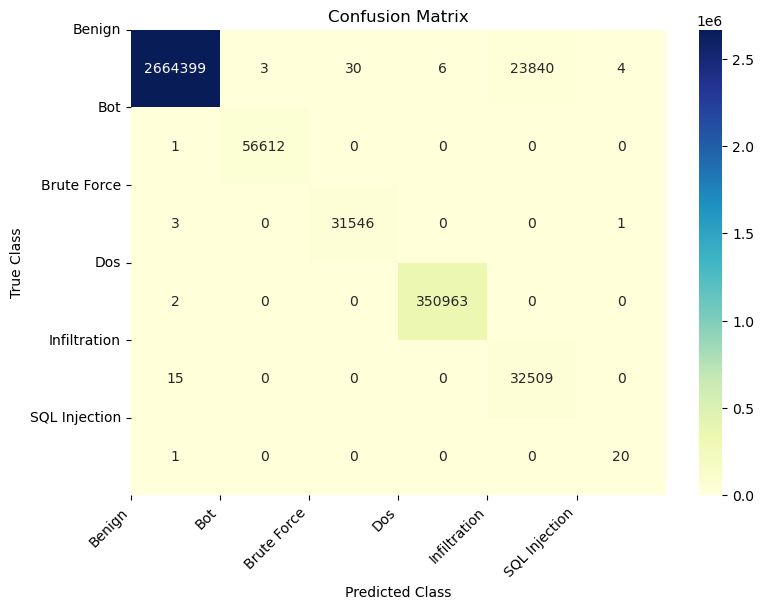

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the best_model
y_pred = model1.predict(X_test)

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

label_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap="YlGnBu", fmt="d")

# Set custom tick labels
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45, ha='right')
plt.yticks(ticks=range(len(label_names)), labels=label_names, rotation=0)

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculating Evaluation Metrics
accuracy_model1 = accuracy_score(y_test, y_pred)
precision_model1 = precision_score(y_test, y_pred, average='weighted')
recall_model1 = recall_score(y_test, y_pred, average='weighted')
f1_model1 = f1_score(y_test, y_pred, average='weighted')

print("Model 1 Accuracy: ", accuracy_model1)
print("Model 1 Precision: ", precision_model1)
print("Model 1 Recall: ", recall_model1)
print("Model 1 F1 Score: ", f1_model1)

Model 1 Accuracy:  0.9924347023929139
Model 1 Precision:  0.9956247642171445
Model 1 Recall:  0.9924347023929139
Model 1 F1 Score:  0.9934298118134848


In [10]:
import pickle

Pkl_Filename = "XGBoost-basic.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model1, file)